In [2]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools

# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
path_to_images = '/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/*/*.png'
images = glob(path_to_images)

print(len(images))

4750


In [0]:
trainingset = []
traininglabels = []
count = 1
scale=70
seed = 7

In [16]:
#There are too many images so we will try to work only on 100 images per folder since it takes lot of time for 4750 images to read
path_to_images_folder = '/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/*'
folder_structures = glob(path_to_images_folder)

for each_folder in folder_structures:
  images_path = each_folder + "/*.png"
  pictures_in_folder = glob(images_path)
  print(each_folder)
  count = 1
  for each_picture in pictures_in_folder:
    trainingset.append(cv2.resize(cv2.imread(each_picture),(scale,scale)))
    traininglabels.append(images_path.split('/')[-2])
    count = count+1
    if len(pictures_in_folder)>100:
      if count == 100:
        break;


trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)

  


12
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Sugar beet
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Sugar beet
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Small-flowered Cranesbill
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Shepherds Purse
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Scentless Mayweed
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Maize
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Loose Silky-bent
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Fat Hen
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Common Chickweed
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Common wheat
/content/drive/My Drive/CNN Project/plant-seedlings-classification/train/Charlock
/content/drive/My Drive/CNN Project/plant-

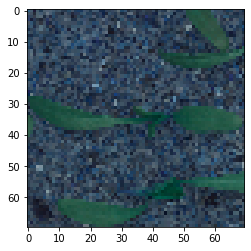

In [20]:
plt.imshow(trainingset[2])

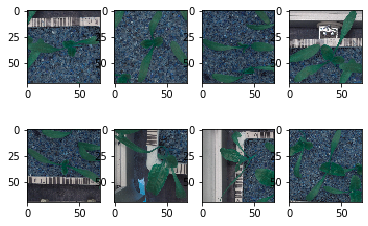

In [17]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(trainingset[i])

In [0]:
#Let us convert the image to HSV format since we want to highlight only green color in picture
def image_clear(img):
  blur = cv2.blur(img,(5,5))
  hsv = cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
  #GREEN PARAMETERS
  lower = (25,40,50)
  upper = (75,255,255)
  # Threshold the HSV image to get only green colors
  mask = cv2.inRange(hsv,lower,upper)
  ## slice the green
  boolean = mask>0
  new = np.zeros_like(img,np.uint8)
  new[boolean] = img[boolean]
  return new

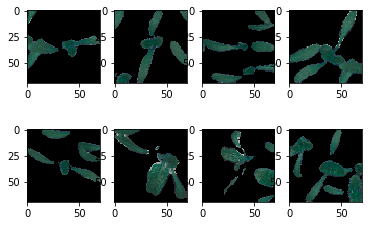

In [25]:
new_train = []
for i in trainingset:
  new_train.append(image_clear(i))

new_train = np.asarray(new_train)
#Lets see pictures after highlighting only green color
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
12


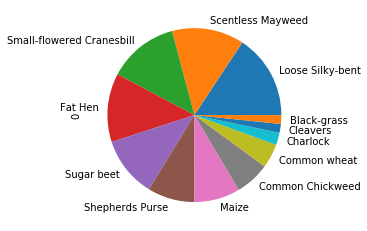

In [26]:
#Lets do label encoding to make sure we have numerical categorisation
labels = preprocessing.LabelEncoder()
labels.fit(traininglabels[0])
print('Classes'+str(labels.classes_))
encodedlabels = labels.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print(str(classes))
traininglabels[0].value_counts().plot(kind='pie')

In [28]:
new_train.shape

(6053, 70, 70, 3)

In [29]:
traininglabels.shape

(6053, 1)

In [0]:
#Lets perform split into test and train data
X = new_train
y= clearalllabels
X = X/255
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

In [49]:
# After preprocessing of data, lets create convolutional 
#This model has 4 convolution layers.
#This model has 3 fully connected layers.
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(scale, scale, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_25 (Batc (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 27, 27, 128)      

In [0]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=2),
                    epochs=1, validation_data=(x_test, y_test))
                                             
                          

Epoch 1/1
  61/2119 [..............................] - ETA: 12:38 - loss: 3.5179 - acc: 0.0984